# Neonatal Sepsis Data


In [1]:
import pandas as pd
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\deag\Anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
df = pd.read_csv("../Data/Neonatal.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sex                                     1723 non-null   int64  
 1   birth_weight_kg                         1723 non-null   float64
 2   onset_age_in_days                       1723 non-null   int64  
 3   onset_hour_of_day                       1723 non-null   int64  
 4   stat_abx                                1723 non-null   int64  
 5   intubated_at_time_of_sepsis_evaluation  1723 non-null   int64  
 6   inotrope_at_time_of_sepsis_eval         1723 non-null   int64  
 7   central_venous_line                     1723 non-null   int64  
 8   umbilical_arterial_line                 1723 non-null   int64  
 9   ecmo                                    1723 non-null   int64  
 10  temp_celsius                            1723 non-null   floa

| Spalte                                 | Beschreibung                      | Blutprobe? | Invasiv? |
| -------------------------------------- | --------------------------------- | ---------- | -------- |
| episode_id                             | ID der Episode                    | Nein       | Nein     |
| unique_patient_id                      | Patienten-ID                      | Nein       | Nein     |
| sex                                    | Geschlecht                        | Nein       | Nein     |
| race                                   | Ethnische Zugehörigkeit           | Nein       | Nein     |
| gestational_age_at_birth_weeks         | Geburtswoche                      | Nein       | Nein     |
| birth_weight_kg                        | Geburtsgewicht                    | Nein       | Nein     |
| sepsis_group                           | Sepsis-Gruppe                     | Nein       | Nein     |
| onset_age_in_days                      | Sepsis-Beginn (Tage)              | Nein       | Nein     |
| onset_hour_of_day                      | Sepsis-Beginn (Uhrzeit)           | Nein       | Nein     |
| blood_culture_positive                 | Blutkultur positiv?               | Ja         | Ja       |
| positive_days                          | Positive Tage                     | Ja         | Ja       |
| cx_site                                | Kulturstandort                    | Ja         | Ja       |
| time_to_antibiotics                    | Zeit bis Antibiotika              | Nein       | Nein     |
| stat_abx                               | Sofortige Antibiotika?            | Nein       | Nein     |
| overall_mortality_within_7_days        | Mortalität (7 Tage)               | Nein       | Nein     |
| overall_mortality_within_14_days       | Mortalität (14 Tage)              | Nein       | Nein     |
| overall_mortality_within_30_days       | Mortalität (30 Tage)              | Nein       | Nein     |
| intubated_at_time_of_sepsis_evaluation | Intubiert bei Sepsis-Evaluation?  | Nein       | Ja       |
| intubated_free_days                    | Tage ohne Intubation              | Nein       | Ja       |
| inotrope_at_time_of_sepsis_eval        | Inotropika bei Sepsis-Evaluation? | Nein       | Ja       |
| inotrope_free_days                     | Tage ohne Inotropika              | Nein       | Ja       |
| central_venous_line                    | Zentrale Venenlinie?              | Nein       | Ja       |
| umbilical_arterial_line                | Nabelarterienlinie?               | Nein       | Ja       |
| ecmo                                   | ECMO verwendet?                   | Nein       | Ja       |
| temp_celsius                           | Temperatur                        | Nein       | Nein     |
| length_of_stay_hours                   | Aufenthaltsdauer                  | Nein       | Nein     |
| comorbidity_necrotizing_enterocolitis  | Nekrotisierende Enterokolitis?    | Nein       | Nein     |
| comorbidity_chronic_lung_disease       | Chronische Lungenerkrankung?      | Nein       | Nein     |
| comorbidity_cardiac                    | Herzprobleme?                     | Nein       | Nein     |
| comorbidity_surgical                   | Chirurgischer Eingriff?           | Nein       | Ja       |
| comorbidity_ivh_or_shunt               | IVH oder Shunt?                   | Nein       | Ja       |
| period                                 | Erfassungszeitraum                | Nein       | Nein     |


In [ ]:
list_intresting_parameters = [
    "sex",
    "birth_weight_kg",
    "sepsis_group",
    "onset_age_in_days",
    "onset_hour_of_day",
    "stat_abx",
    "intubated_at_time_of_sepsis_evaluation",
    "inotrope_at_time_of_sepsis_eval",
    "central_venous_line",
    "umbilical_arterial_line",
    "ecmo",
    "temp_celsius",
    "comorbidity_necrotizing_enterocolitis",
    "comorbidity_chronic_lung_disease",
    "comorbidity_cardiac",
    "comorbidity_surgical",
    "comorbidity_ivh_or_shunt",
]

df = df[list_intresting_parameters]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sex                                     1946 non-null   int64  
 1   birth_weight_kg                         1894 non-null   float64
 2   sepsis_group                            1946 non-null   int64  
 3   onset_age_in_days                       1946 non-null   int64  
 4   onset_hour_of_day                       1946 non-null   int64  
 5   stat_abx                                1946 non-null   int64  
 6   intubated_at_time_of_sepsis_evaluation  1946 non-null   int64  
 7   inotrope_at_time_of_sepsis_eval         1946 non-null   int64  
 8   central_venous_line                     1946 non-null   int64  
 9   umbilical_arterial_line                 1946 non-null   int64  
 10  ecmo                                    1946 non-null   int6

## Plot


In [ ]:
df.describe()


,sex,birth_weight_kg,sepsis_group,onset_age_in_days,onset_hour_of_day,stat_abx,intubated_at_time_of_sepsis_evaluation,inotrope_at_time_of_sepsis_eval,central_venous_line,umbilical_arterial_line,ecmo,temp_celsius,comorbidity_necrotizing_enterocolitis,comorbidity_chronic_lung_disease,comorbidity_cardiac,comorbidity_surgical,comorbidity_ivh_or_shunt
count,1946.000000,1894.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.0000,1946.000000,1942.000000,1946.00000,1946.000000,1946.000000,1946.000000,1946.000000
mean,0.576567,2.009187,2.521583,66.431655,10.560123,0.871531,0.648510,0.081706,0.671120,0.1074,0.039568,37.527909,0.17369,0.301644,0.183453,0.341213,0.138746
std,0.494230,1.121012,1.263201,70.165333,6.533421,0.334697,0.477558,0.273987,0.469927,0.3097,0.194993,0.751275,0.37894,0.459090,0.387137,0.474239,0.345770
min,0.000000,0.370000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,33.700000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.880000,2.000000,10.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,37.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.040000,2.000000,44.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.0000,0.000000,37.300000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.950000,3.000000,105.750000,16.000000,1.000000,1.000000,0.000000,1.000000,0.0000,0.000000,38.000000,0.00000,1.000000,0.000000,1.000000,0.000000
max,1.000000,5.950000,6.000000,335.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,41.300000,1.00000,1.000000,1.000000,1.000000,1.000000


## Modelle ausprobieren


Splitting data set in without na and male/female


In [4]:
df.replace("NI", np.nan, inplace=True)
# df = df[df["sepsis_group"] != 6]

In [ ]:
# # Benutzerdefinierte Funktion zur Zuordnung von Werten zu 0 oder 1
# def map_to_binary(value):
#     if value == 1 or value in [4, 5]:
#         return 1
#     else:
#         return 0


# # Eine neue Spalte "sepsis_binary" erstellen, indem Sie die benutzerdefinierte Funktion auf die "sepsis_group"-Spalte anwenden
# df["sepsis_binary"] = df["sepsis_group"].apply(map_to_binary)

In [5]:
df_male = df[df["sex"] == 1]
df_female = df[df["sex"] == 0]

df_without_nan = df.dropna()
# df_without_nan = df_without_nan.drop("sepsis_group", axis=1)
# df_male_without_nan = df_male.dropna()
# df_female_without_nan = df_female.dropna()


In [6]:
df_without_nan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sex                                     1723 non-null   int64  
 1   birth_weight_kg                         1723 non-null   float64
 2   onset_age_in_days                       1723 non-null   int64  
 3   onset_hour_of_day                       1723 non-null   int64  
 4   stat_abx                                1723 non-null   int64  
 5   intubated_at_time_of_sepsis_evaluation  1723 non-null   int64  
 6   inotrope_at_time_of_sepsis_eval         1723 non-null   int64  
 7   central_venous_line                     1723 non-null   int64  
 8   umbilical_arterial_line                 1723 non-null   int64  
 9   ecmo                                    1723 non-null   int64  
 10  temp_celsius                            1723 non-null   floa

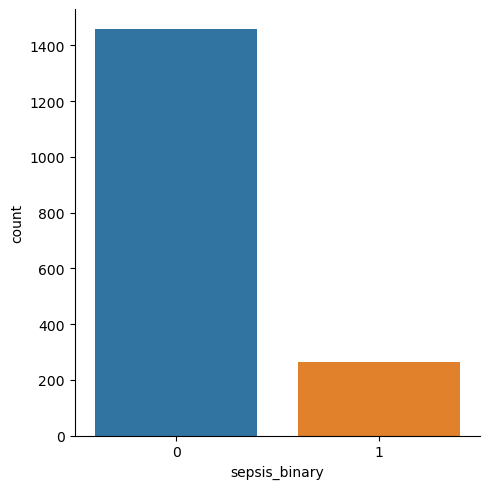

In [7]:
sns.catplot(data=df_without_nan, x="sepsis_binary", kind="count")

### All gender with na


In [ ]:
# X = df[df.columns.difference(['sepsis_group', "sepsis_binary"])]
# df['sepsis_binary'] = df['sepsis_binary']
# y = df['sepsis_binary']

# # Train-Test-Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = HistGradientBoostingClassifier()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test_scaled)
# # accuracy = accuracy_score(y_test, y_pred)
# # print(f"{name}: {accuracy}")
# print(len(X_test), len(y_test), len(y_pred), y_train.shape)


In [8]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix für {model_name}")
    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Tatsächliche Klasse")
    plt.show()

In [ ]:
# df_without_nan.to_csv("../Data/Neonatal.csv", index=False)


### All gender without na


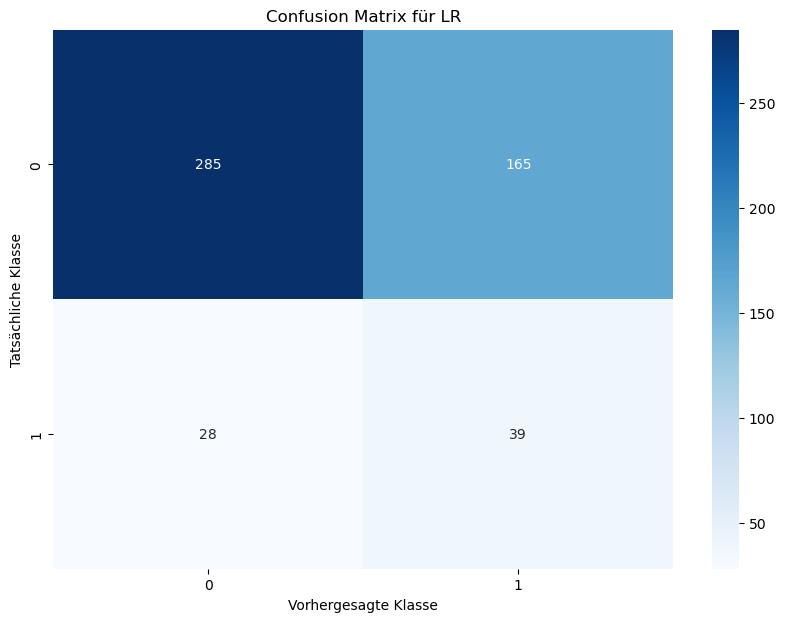

LR: 0.6266924564796905


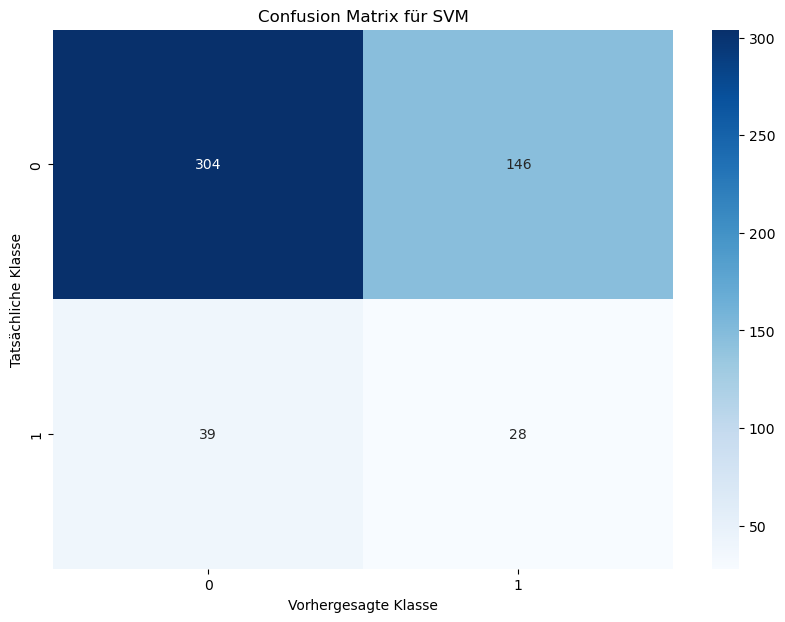

SVM: 0.6421663442940039


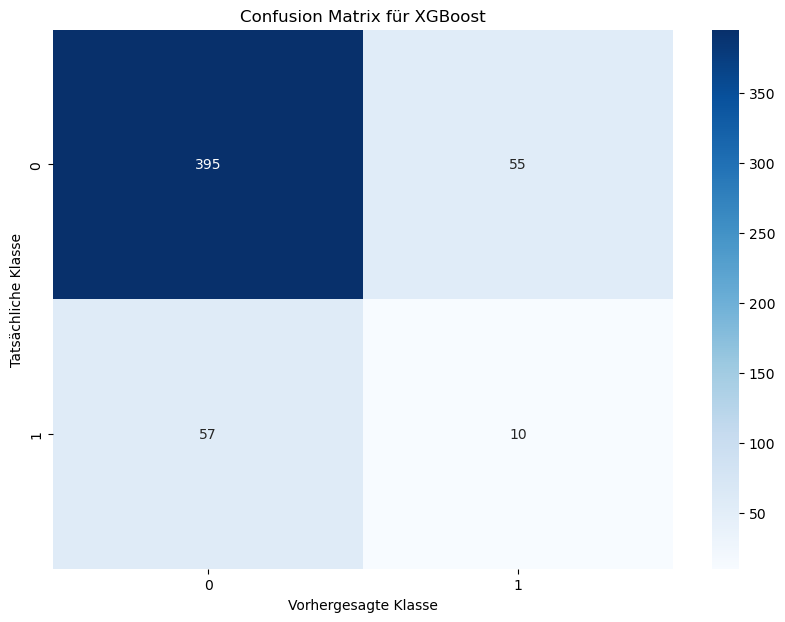

XGBoost: 0.7833655705996132


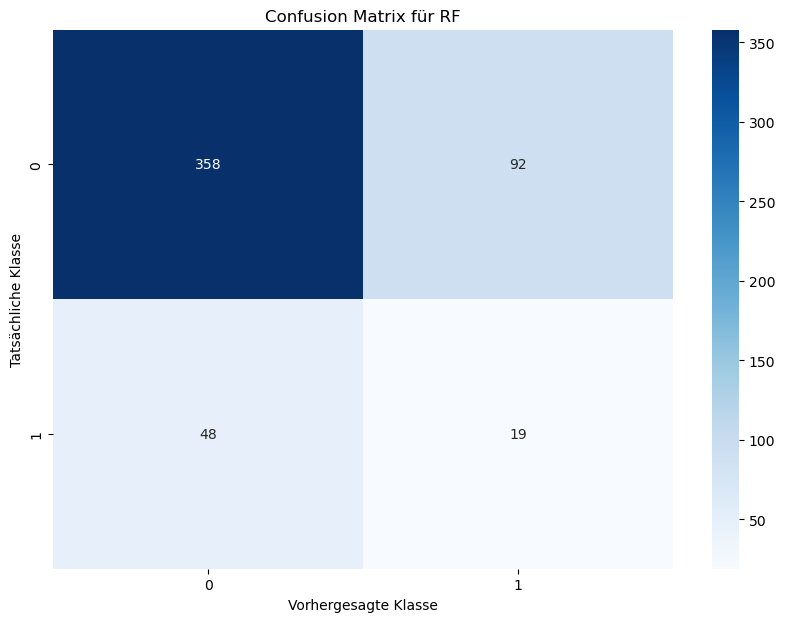

RF: 0.7292069632495164


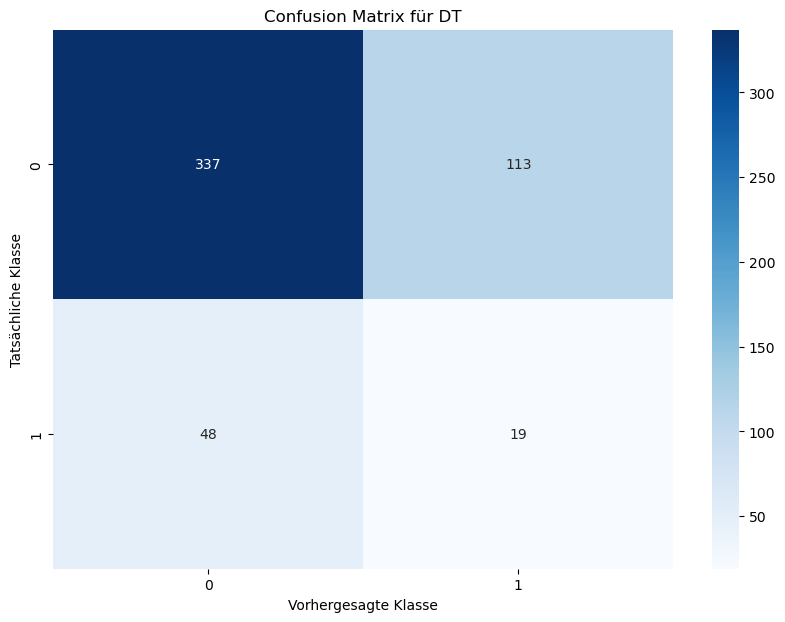

DT: 0.688588007736944


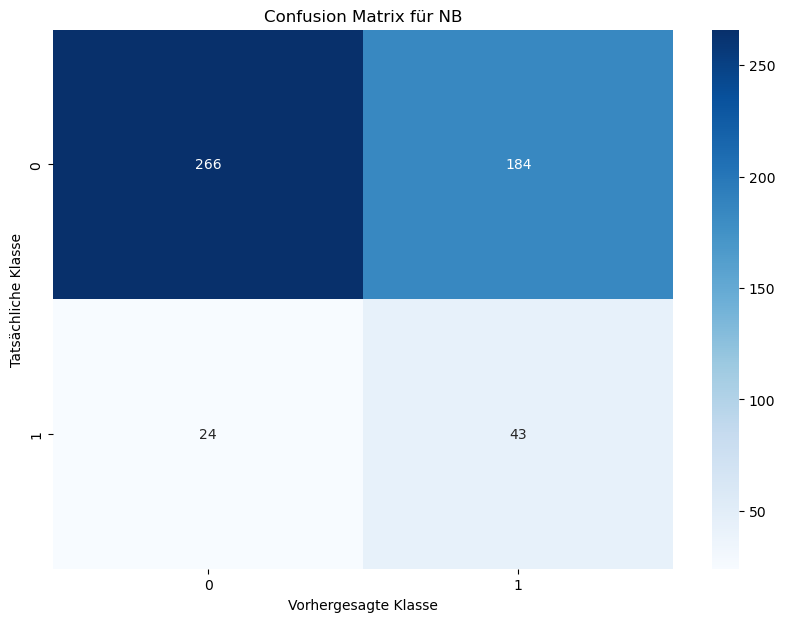

NB: 0.597678916827853
Ausgewählte Merkmale:
Index(['birth_weight_kg', 'comorbidity_surgical', 'onset_age_in_days', 'sex',
       'temp_celsius'],
      dtype='object')


In [16]:
X = df_without_nan[df_without_nan.columns.difference(["sepsis_binary"])]
df_without_nan["sepsis_binary"] = df_without_nan["sepsis_binary"]
y = df_without_nan["sepsis_binary"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Schritt 3: Feature Selection mit SelectKBest auf den resamplten Trainingsdaten
selector = SelectKBest(mutual_info_classif, k=5)  # Wählen Sie die besten 5 Merkmale aus
X_train_selected = selector.fit_transform(X_train_scaled, y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

# [('learning_rate', 0.2), ('max_depth', 4), ('n_estimators', 150)]
# Modelle initialisieren
# criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 200
models = {
    "LR": LogisticRegression(),
    "SVM": SVC(),
    # "XGBoost": XGBClassifier(eval_metric='mlogloss', learning_rate=0.2, max_depth=4, n_estimators=150),
    "XGBoost": XGBClassifier(
        eval_metric="mlogloss",
    ),
    "RF": RandomForestClassifier(),
    # "RF": RandomForestClassifier(max_depth =30, min_samples_split= 2, n_estimators=200, criterion='entropy'),
    "DT": DecisionTreeClassifier(),
    "NB": GaussianNB(),
}

for name, model in models.items():
    model.fit(X_train_selected, y_train_resampled.values.ravel())
    y_pred = model.predict(X_test_selected)

    # Berechne die Confusion Matrix und zeige sie an
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy}")


# Nachdem Sie SelectKBest angewendet haben, können Sie die ausgewählten Indizes der Merkmale abrufen.
selected_feature_indices = selector.get_support(indices=True)

# Verwenden Sie die Indizes, um die Namen der ausgewählten Merkmale aus Ihrem ursprünglichen DataFrame abzurufen.
selected_feature_names = X.columns[selected_feature_indices]

# Drucken Sie die Namen der ausgewählten Merkmale aus.
print("Ausgewählte Merkmale:")
print(selected_feature_names)

c:\Users\deag\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\deag\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Voting Classifier: 0.7543520309477756


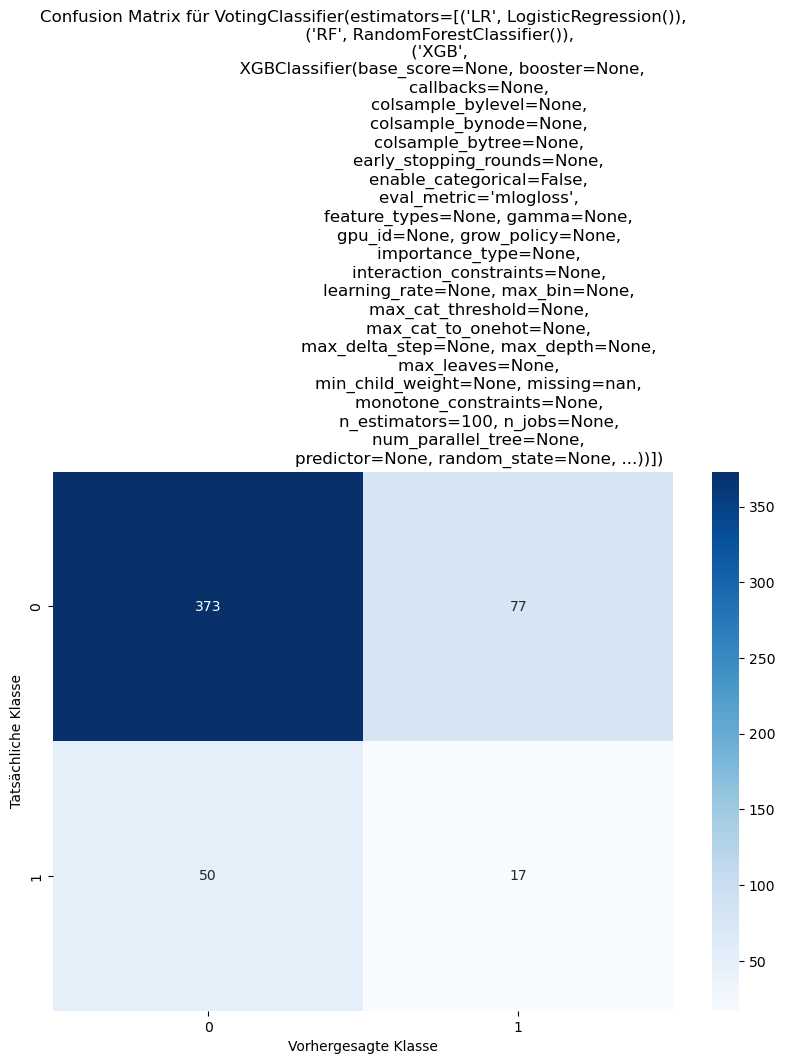

In [17]:

# Modelle, die du kombinieren möchtest
models = [
    ("LR", LogisticRegression()),
    ("RF", RandomForestClassifier()),
    ("XGB", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")),
]

# Voting Classifier erstellen
voting_clf = VotingClassifier(estimators=models, voting="hard")

# Training des Voting Classifiers
voting_clf.fit(X_train_selected, y_train_resampled.values.ravel())

# Evaluierung des Voting Classifiers
y_pred = voting_clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier: {accuracy}")
# Berechne die Confusion Matrix und zeige sie an
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, voting_clf)

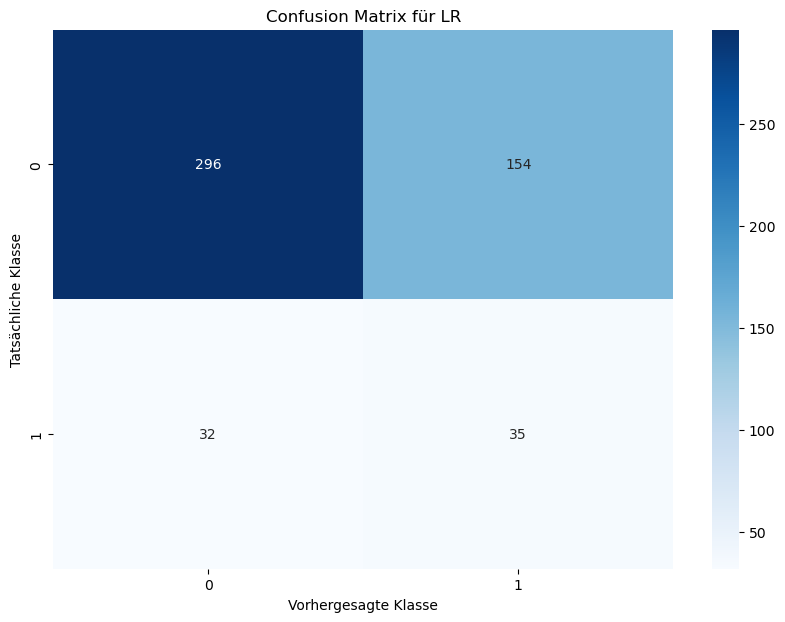

LR: 0.6402321083172147


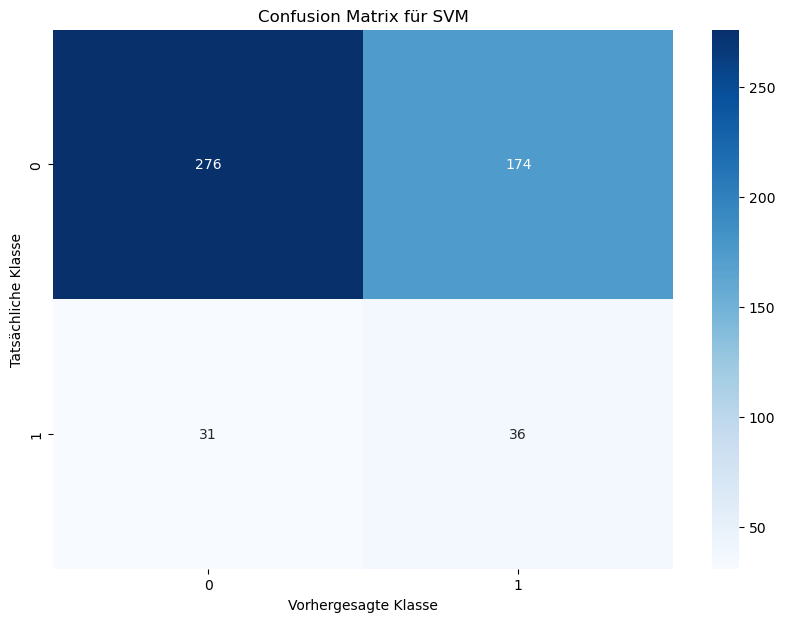

SVM: 0.6034816247582205


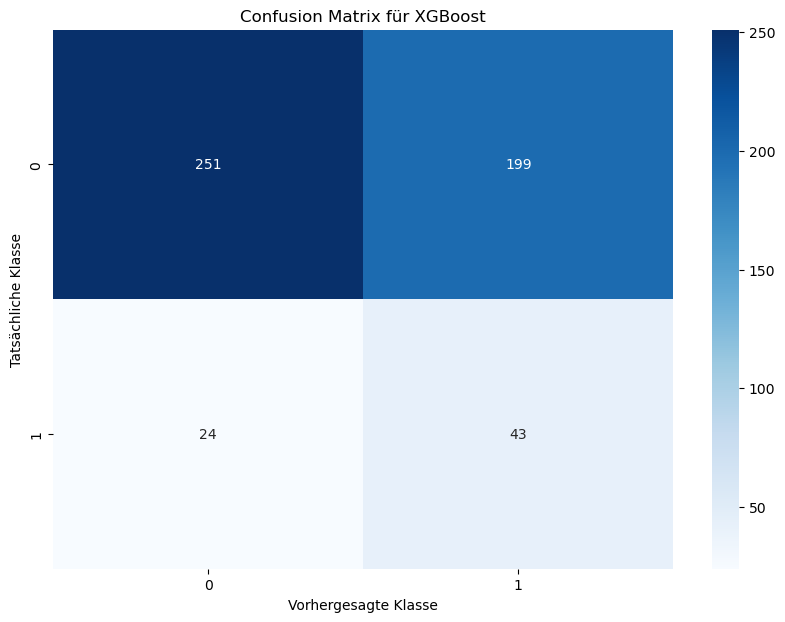

XGBoost: 0.5686653771760155


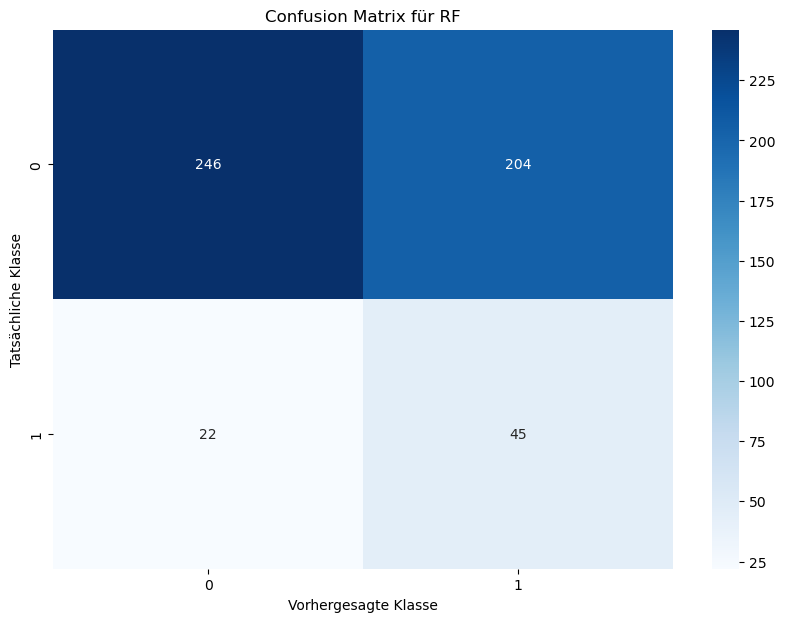

RF: 0.562862669245648


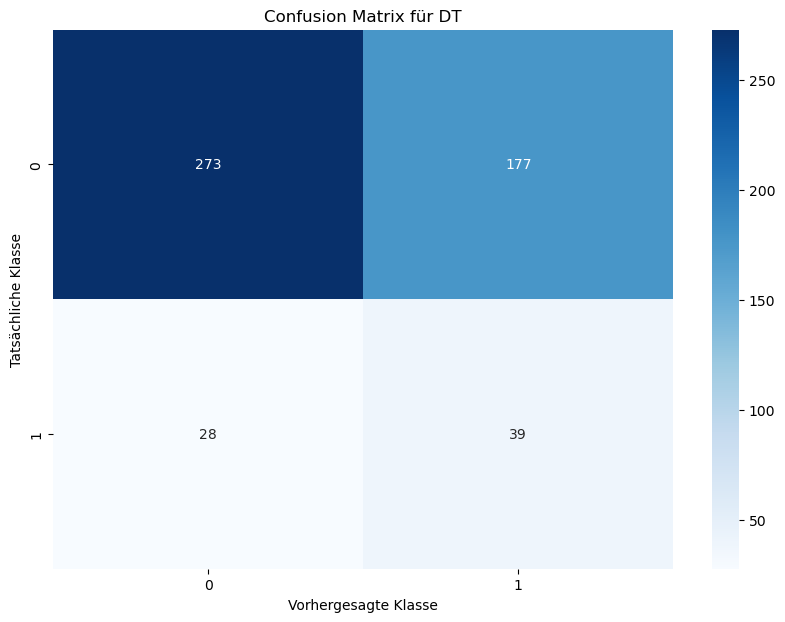

DT: 0.6034816247582205


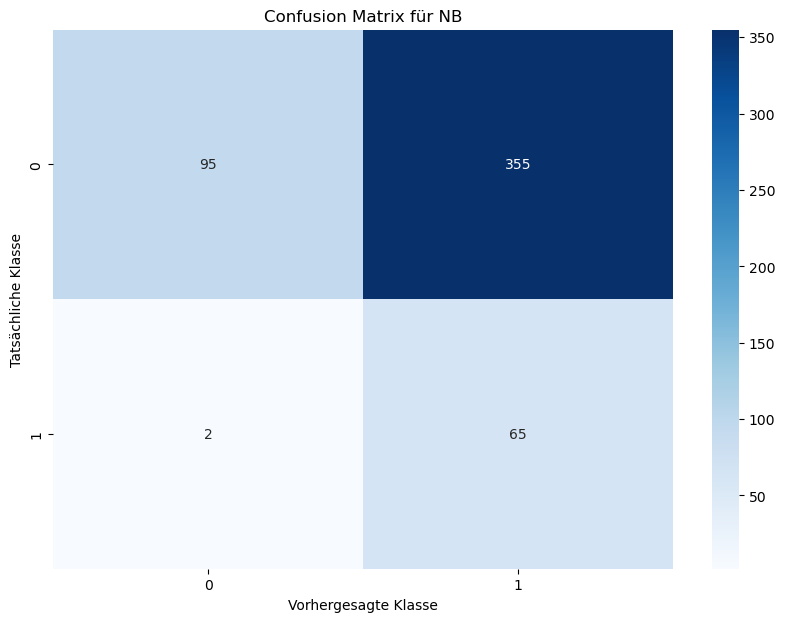

NB: 0.30947775628626695
Ausgewählte Merkmale:
Index(['comorbidity_ivh_or_shunt', 'ecmo', 'onset_age_in_days', 'stat_abx',
       'umbilical_arterial_line'],
      dtype='object')


In [11]:
X = df_without_nan[df_without_nan.columns.difference(["sepsis_binary", "sepsis_group"])]
df_without_nan["sepsis_binary"] = df_without_nan["sepsis_binary"]
y = df_without_nan["sepsis_binary"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.under_sampling import RandomUnderSampler

# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


# Feature Scaling
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Schritt 3: Feature Selection mit SelectKBest auf den resamplten Trainingsdaten
selector = SelectKBest(mutual_info_classif, k=5)  # Wählen Sie die besten 5 Merkmale aus
X_train_selected = selector.fit_transform(X_train_scaled, y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

# [('learning_rate', 0.2), ('max_depth', 4), ('n_estimators', 150)]
# Modelle initialisieren
# criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 200
models = {
    "LR": LogisticRegression(),
    "SVM": SVC(),
    # "XGBoost": XGBClassifier(eval_metric='mlogloss', learning_rate=0.2, max_depth=4, n_estimators=150),
    "XGBoost": XGBClassifier(
        eval_metric="mlogloss",
    ),
    "RF": RandomForestClassifier(),
    # "RF": RandomForestClassifier(max_depth =30, min_samples_split= 2, n_estimators=200, criterion='entropy'),
    "DT": DecisionTreeClassifier(),
    "NB": GaussianNB(),
}

for name, model in models.items():
    model.fit(X_train_selected, y_train_resampled.values.ravel())
    y_pred = model.predict(X_test_selected)

    # Berechne die Confusion Matrix und zeige sie an
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy}")


# Nachdem Sie SelectKBest angewendet haben, können Sie die ausgewählten Indizes der Merkmale abrufen.
selected_feature_indices = selector.get_support(indices=True)

# Verwenden Sie die Indizes, um die Namen der ausgewählten Merkmale aus Ihrem ursprünglichen DataFrame abzurufen.
selected_feature_names = X.columns[selected_feature_indices]

# Drucken Sie die Namen der ausgewählten Merkmale aus.
print("Ausgewählte Merkmale:")
print(selected_feature_names)

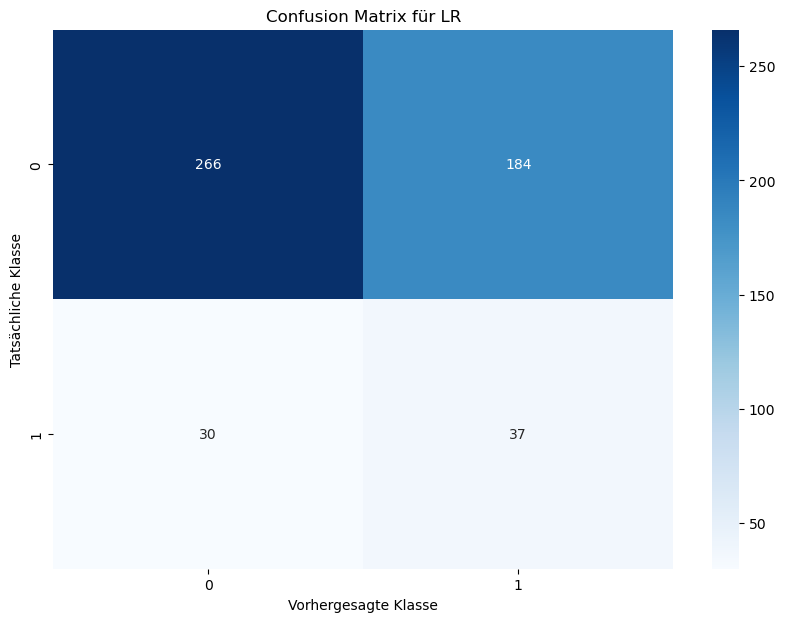

LR: 0.586073500967118


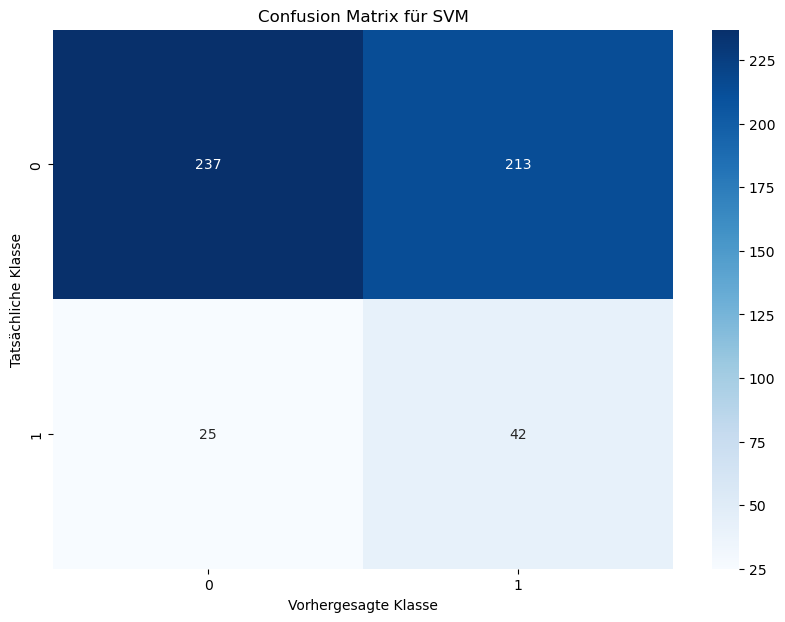

SVM: 0.539651837524178


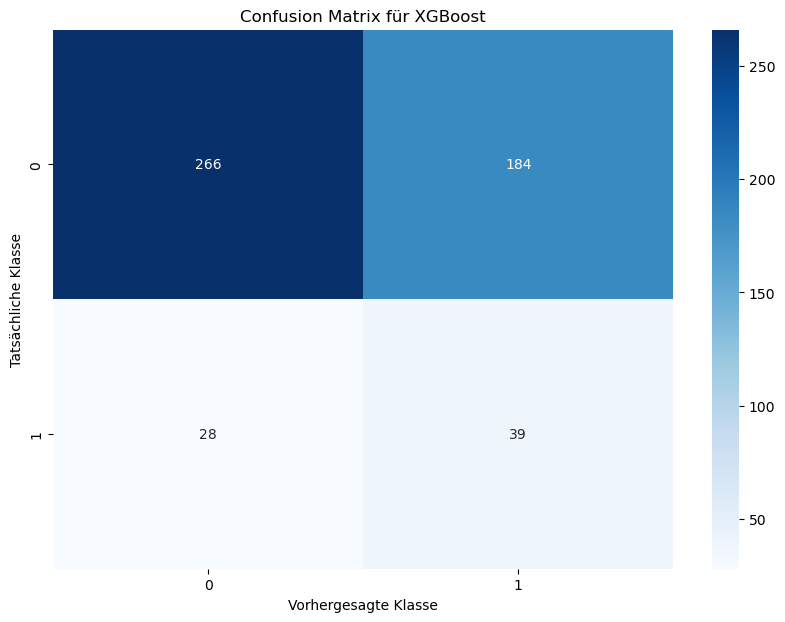

XGBoost: 0.5899419729206963


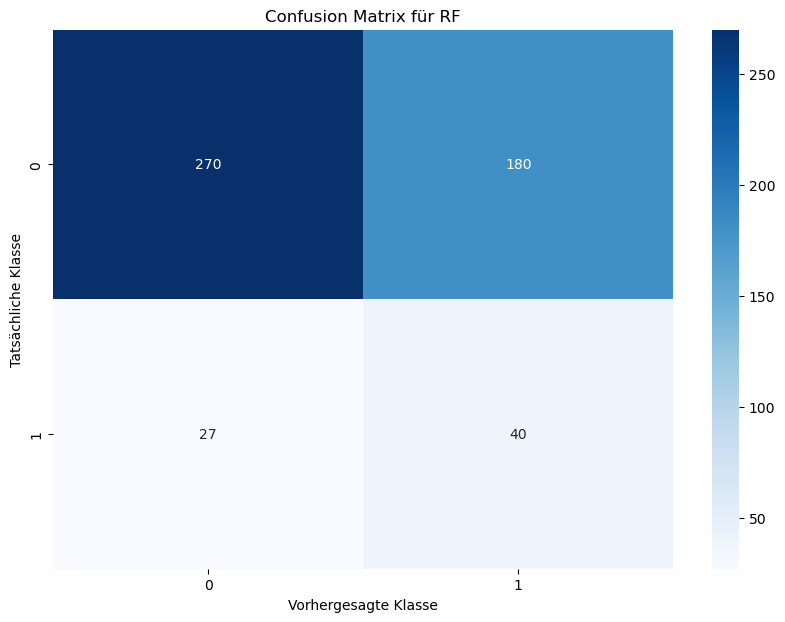

RF: 0.5996131528046421


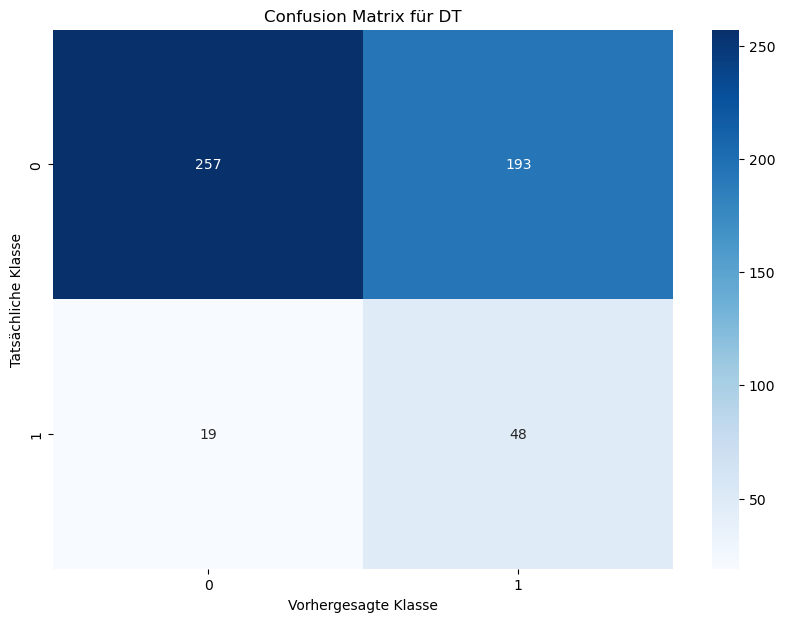

DT: 0.5899419729206963


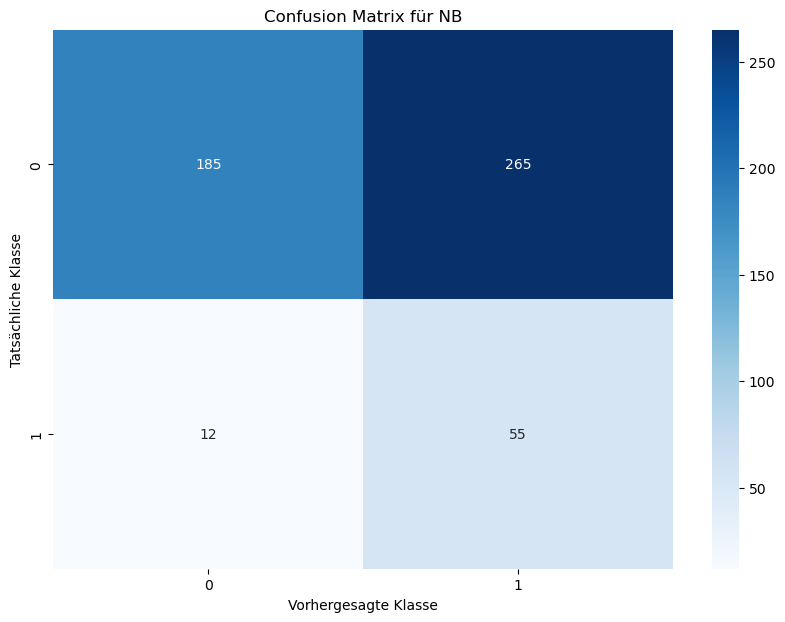

NB: 0.46421663442940037


In [13]:
X = df_without_nan[df_without_nan.columns.difference(["sepsis_binary", "sepsis_group"])]
df_without_nan["sepsis_binary"] = df_without_nan["sepsis_binary"]
y = df_without_nan["sepsis_binary"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.under_sampling import RandomUnderSampler

# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


# Feature Scaling
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# # Schritt 3: Feature Selection mit SelectKBest auf den resamplten Trainingsdaten
# selector = SelectKBest(mutual_info_classif, k=5)  # Wählen Sie die besten 5 Merkmale aus
# X_train_selected = selector.fit_transform(X_train_scaled, y_train_resampled)
# X_test_selected = selector.transform(X_test_scaled)

# [('learning_rate', 0.2), ('max_depth', 4), ('n_estimators', 150)]
# Modelle initialisieren
# criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 200
models = {
    "LR": LogisticRegression(),
    "SVM": SVC(),
    # "XGBoost": XGBClassifier(eval_metric='mlogloss', learning_rate=0.2, max_depth=4, n_estimators=150),
    "XGBoost": XGBClassifier(
        eval_metric="mlogloss",
    ),
    "RF": RandomForestClassifier(),
    # "RF": RandomForestClassifier(max_depth =30, min_samples_split= 2, n_estimators=200, criterion='entropy'),
    "DT": DecisionTreeClassifier(),
    "NB": GaussianNB(),
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled.values.ravel())
    y_pred = model.predict(X_test_scaled)

    # Berechne die Confusion Matrix und zeige sie an
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy}")


# # Nachdem Sie SelectKBest angewendet haben, können Sie die ausgewählten Indizes der Merkmale abrufen.
# selected_feature_indices = selector.get_support(indices=True)

# # Verwenden Sie die Indizes, um die Namen der ausgewählten Merkmale aus Ihrem ursprünglichen DataFrame abzurufen.
# selected_feature_names = X.columns[selected_feature_indices]

# # Drucken Sie die Namen der ausgewählten Merkmale aus.
# print("Ausgewählte Merkmale:")
# print(selected_feature_names)

c:\Users\deag\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\deag\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Voting Classifier: 0.5841392649903289


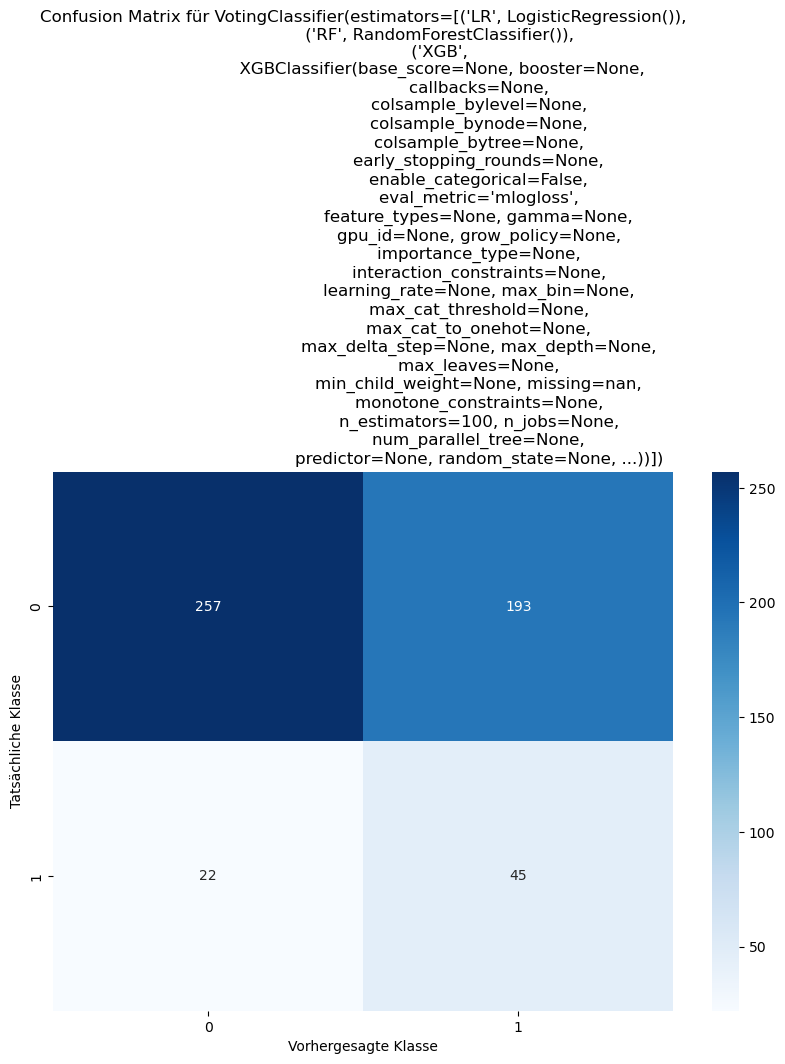

In [15]:
from sklearn.ensemble import VotingClassifier

# Modelle, die du kombinieren möchtest
models = [
    ("LR", LogisticRegression()),
    ("RF", RandomForestClassifier()),
    ("XGB", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")),
]

# Voting Classifier erstellen
voting_clf = VotingClassifier(estimators=models, voting="hard")

# Training des Voting Classifiers
voting_clf.fit(X_train_selected, y_train_resampled.values.ravel())

# Evaluierung des Voting Classifiers
y_pred = voting_clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier: {accuracy}")
# Berechne die Confusion Matrix und zeige sie an
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, voting_clf)

In [ ]:
X = df_male_without_nan[
    df_male_without_nan.columns.difference(["sepsis_binary", "sepsis_group"])
]
df_male_without_nan["sepsis_binary"] = df_male_without_nan["sepsis_binary"]
y = df_male_without_nan["sepsis_binary"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Modelle initialisieren
models = {
    "LR": LogisticRegression(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "RF": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "NB": GaussianNB(),
}

# Modelle trainieren und evaluieren
for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled.values.ravel())
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy}")

LR: 0.6451612903225806
SVM: 0.6175115207373272


C:\Users\deag\AppData\Local\Temp\ipykernel_28240\2477604896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male_without_nan['sepsis_binary'] = df_male_without_nan['sepsis_binary']
c:\Users\deag\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost: 0.6682027649769585
RF: 0.6682027649769585
KNN: 0.5668202764976958
DT: 0.6589861751152074
NB: 0.4470046082949309


### PCA


[0.9846538  0.99312809 0.99830774 0.99918622 0.99951108]


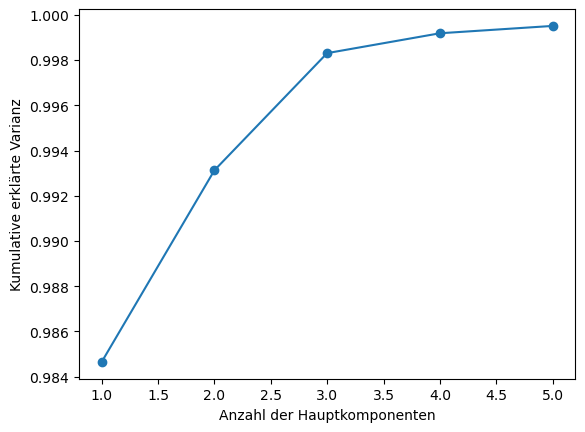

In [ ]:
pca = PCA(n_components=5)  # Zum Beispiel, um die Dimensionalität auf 2 zu reduzieren
X_pca = pca.fit_transform(df_without_nan)

# import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    cumulative_variance,
    marker="o",
    linestyle="-",
)
plt.xlabel("Anzahl der Hauptkomponenten")
plt.ylabel("Kumulative erklärte Varianz")
plt.show()

In [ ]:
# Die Ladevektoren für die ersten beiden Hauptkomponenten abrufen
first_pc_loading_vector = pca.components_[0]
second_pc_loading_vector = pca.components_[1]

# Die Ladevektoren ausgeben
print("Ladevektor für die erste Hauptkomponente:")
print(first_pc_loading_vector)

print("\nLadevektor für die zweite Hauptkomponente:")
print(second_pc_loading_vector)

Ladevektor für die erste Hauptkomponente:
[-2.55545893e-02 -4.78099260e-04 -4.90303865e-03 -5.65999259e-03
  1.11300328e-03  9.99606355e-01 -5.48910481e-03  4.21299787e-04
  1.20922140e-03 -2.54052147e-04  2.64867741e-04 -1.35592459e-03
 -4.08141029e-04  4.35578164e-03  1.45736182e-03  4.11221980e-03
  8.94549871e-04 -1.53915785e-03  8.29064900e-04  8.83978722e-04]

Ladevektor für die zweite Hauptkomponente:
[ 5.58363883e-02  1.12167797e-03  4.03509120e-03  9.19717247e-03
 -1.70113892e-03  6.98734368e-03  9.98345655e-01  8.79581606e-04
 -3.93226620e-03 -1.08491696e-04 -2.54658651e-03 -6.43458523e-04
 -1.27587354e-03  1.39294982e-03 -6.66049448e-05 -1.21045014e-03
 -6.61358102e-04 -1.25104232e-03 -1.98485405e-03 -5.27570126e-04]


In [ ]:
# Index der Spalte mit dem größten Beitrag zur ersten Hauptkomponente finden
max_contributor_index = np.argmax(np.abs(first_pc_loading_vector))

# Den Namen der Spalte aus dem DataFrame abrufen
column_name = df_without_nan.columns[max_contributor_index]

print(
    f"Die Spalte mit dem größten Beitrag zur ersten Hauptkomponente ist '{column_name}'"
)

Die Spalte mit dem größten Beitrag zur ersten Hauptkomponente ist 'onset_age_in_days'


In [ ]:
# Index der Spalte mit dem größten Beitrag zur ersten Hauptkomponente finden
max_contributor_index = np.argmax(np.abs(second_pc_loading_vector))

# Den Namen der Spalte aus dem DataFrame abrufen
column_name = df_without_nan.columns[max_contributor_index]

print(
    f"Die Spalte mit dem größten Beitrag zur zweiten Hauptkomponente ist '{column_name}'"
)

Die Spalte mit dem größten Beitrag zur zweiten Hauptkomponente ist 'onset_hour_of_day'


In [ ]:
X = df_without_nan[df_without_nan.columns.difference(["sepsis_binary", "sepsis_group"])]
df_without_nan["sepsis_binary"] = df_without_nan["sepsis_binary"]
y = df_without_nan["sepsis_binary"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Schritt 3: Feature Selection mit SelectKBest auf den resamplten Trainingsdaten
selector = SelectKBest(mutual_info_classif, k=5)  # Wählen Sie die besten 5 Merkmale aus
X_train_selected = selector.fit_transform(X_train_scaled, y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)


# Modelle initialisieren
models = {
    "LR": LogisticRegression(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "RF": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "NB": GaussianNB(),
}

# Modelle trainieren und evaluieren
for name, model in models.items():
    model.fit(X_train_selected, y_train_resampled.values.ravel())
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy}")

# Nachdem Sie SelectKBest angewendet haben, können Sie die ausgewählten Indizes der Merkmale abrufen.
selected_feature_indices = selector.get_support(indices=True)

# Verwenden Sie die Indizes, um die Namen der ausgewählten Merkmale aus Ihrem ursprünglichen DataFrame abzurufen.
selected_feature_names = X.columns[selected_feature_indices]

# Drucken Sie die Namen der ausgewählten Merkmale aus.
print("Ausgewählte Merkmale:")
print(selected_feature_names)

C:\Users\deag\AppData\Local\Temp\ipykernel_28240\4200851233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nan['sepsis_binary'] = df_without_nan['sepsis_binary']
c:\Users\deag\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


LR: 0.5946666666666667
SVM: 0.584
XGBoost: 0.7226666666666667
RF: 0.7253333333333334
KNN: 0.5946666666666667
DT: 0.6453333333333333
NB: 0.6


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

xgb_params = {
    "learning_rate": Real(0.01, 0.2, "log-uniform"),
    "max_depth": Integer(3, 10),
    "n_estimators": Integer(50, 150),
}

xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42)
xgb_bayes_search = BayesSearchCV(
    xgb_model, xgb_params, n_iter=32, cv=5, n_jobs=-1, random_state=42
)
xgb_bayes_search.fit(X_train_selected, y_train_resampled.values.ravel())

print("Beste Parameter für XGBoost:", xgb_bayes_search.best_params_)

Beste Parameter für XGBoost: OrderedDict([('learning_rate', 0.2), ('max_depth', 4), ('n_estimators', 150)])


In [ ]:
rf_params = {
    "n_estimators": Integer(50, 150),
    "max_depth": Integer(10, 30),
    "min_samples_split": Integer(2, 10),
}

rf_model = RandomForestClassifier(random_state=42)
rf_bayes_search = BayesSearchCV(
    rf_model, rf_params, n_iter=32, cv=5, n_jobs=-1, random_state=42
)
rf_bayes_search.fit(X_train_selected, y_train_resampled.values.ravel())

print("Beste Parameter für RF:", rf_bayes_search.best_params_)

c:\Users\deag\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Beste Parameter für RF: OrderedDict([('max_depth', 30), ('min_samples_split', 2), ('n_estimators', 50)])


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "criterion": ["gini", "entropy"],
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train_resampled.values.ravel())

# Beste Parameter ausgeben
print("Beste Parameter:", grid_search.best_params_)

# Beste Modell verwenden
best_rf_model = grid_search.best_estimator_

c:\Users\deag\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\deag\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\deag\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

Beste Parameter: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 200}
